g(x)<epsilon
Found stationary point of f:  [-8.87444994e-11 -1.28338719e-08]


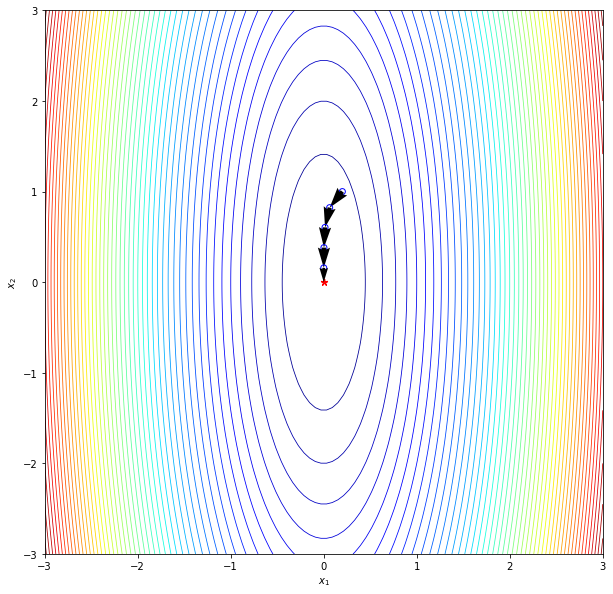

In [34]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.optimize import NonlinearConstraint



def g(x):
    return np.array([20*x[0], 2*x[1]])

def f(x): 
    return 10*x[0]**2+x[1]**2

def f_plot(x, y):
    return 10*x**2+y**2

def m(x):
    return f(x_)+g(x_).T.dot(x-x_)+0.5*(x-x_).T.dot(Hk).dot(x-x_)

def rhok(x, x_):
    num=f(x_)-f(x)
    den=m(x_)-m(x)
    return num/den

def find_reg(rho, x_, x, radius, radius_max=1):
    rad_max=radius_max
    rho_0=rho
    rad_=radius
    
    if rho<0.25:
        rad=0.25*rad_
    elif rho>0.75 and LA.norm(x-x_)==rad_:
        rad=min(2*rad_,rad_max)
    else:
        rad=rad_
        
    return rad

x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)

x_star=[0, 0]
x_0=np.array([.2,1])
Hk=np.array([[20,0],[0,2]])
rad_0=0.05

plt.figure(figsize=(10,10))

X, Y = np.meshgrid(x, y)
Z = f_plot(X, Y)
cp = plt.contour(X, Y, Z, 50 , cmap=plt.cm.jet, linewidths=0.8)
plt.scatter(x_star[0], x_star[1], color='red', marker=(5, 2))


def trust_region(x_0, epsilon= 0.0001, nIter=2000):
    x=x_0
    nIter=nIter
    epsilon=epsilon
    k=0
    eta=0
    rad=rad_0
    
    for n in range(nIter):
        if LA.norm(g(x))<epsilon:
            print('g(x)<epsilon')
            break
        
        x_=x
        
        con=lambda x: (x[0]-x_[0])**2+(x[1]-x_[1])**2
        region= NonlinearConstraint(con, -np.inf, rad)
        minimum=optimize.minimize(m, x_, constraints=region)
        x=minimum.x
        rho=rhok(x, x_)
        rad=find_reg(rho, x_, x, rad)
        
        if rho<eta:
            x=x_
        
        plt.scatter(x_[0], x_[1], color='b', marker='o',facecolors='none')
        plt.quiver(x_[0], x_[1], x[0]-x_[0], x[1]-x_[1], scale_units='xy', angles='xy', scale=1, color='k',linewidths=0.001)
        
        k+=1
        
    return x

x=trust_region(x_0)

print('Found stationary point of f: ', x)
    
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

In [26]:
import numpy as np
from scipy import optimize

def g(x):
    return np.array([20*x[0], 2*x[1]])

def f(x): 
    return 10*x[0]**2+x[1]**2+1

def m(x):
    Hk=np.array([[20,0],[0,2]])
    return f(xk)+g(xk).T.dot(x-xk)+0.5*(x-xk).T.dot(Hk).dot(x-xk)

xk=np.array([10,200])


minimum=optimize.minimize(m, xk)

In [24]:
print(minimum.x)

[ 1.07131723e-05 -6.57454381e-05]


In [14]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
from scipy import optimize
import lmfit

rad=0.8
x_=np.array([3,4])
Hk=np.array([[20,0],[0,2]])

def g(x):
    return np.array([20*x[0], 2*x[1]])

def f(x): 
    return 10*x[0]**2+x[1]**2

def m(x):
    while LA.norm(x-x_)<rad:
        return f(x_)+g(x_).T.dot(x-x_)+0.5*(x-x_).T.dot(Hk).dot(x-x_)
    
value=lmfit.Minimizer(m)

TypeError: __init__() missing 1 required positional argument: 'params'

In [16]:
x

array([3, 4])

In [12]:
pip install lmfit

     |████████████████████████████████| 306 kB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 55 kB 2.6 MB/s eta 0:00:01
     |████████████████████████████████| 246 kB 3.1 MB/s eta 0:00:01
  Created wheel for lmfit: filename=lmfit-1.0.2-py3-none-any.whl size=85261 sha256=3c022edb1d5689ab007558ffa8a9354a6c33084172818538f692e36682a5a36c
  Stored in directory: /Users/zachdouglas/Library/Caches/pip/wheels/2c/17/f4/1ec5177c8589e18c329907db7db4f1c4524bb73251d34f3622
  Created wheel for asteval: filename=asteval-0.9.23-py3-none-any.whl size=17418 sha256=1dd571c546137b2b160f96449a17c7951ba26bdf808fe0169689886d3f49930d
  Stored in directory: /Users/zachdouglas/Library/Caches/pip/wheels/2f/3c/df/1c0eafdd1d6ff5b36e3a0030eaab4d8465f8f94ae9c2b74d39
Successfully built lmfit asteval
Note: you may need to restart the kernel to use updated packages.
